In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split as tits
from sklearn.preprocessing import StandardScaler as StSc
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential as sq
from tensorflow.keras.layers import Dense

We have seen from the EDA that we won't need some column so with some basic eda we will figuring that out

In [2]:
df = pd.read_csv('C:/Users/91771/OneDrive/Documents/GitHub/Customer_Churn_EDA_Analysis/churn_dataset.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**So from here we will be dropping the 'CustomerId'  column as it can't be a valid predictor.**

In [5]:
df.drop(columns = ['customerID'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


checking Senior citizen(if value= 1) numbers:

In [7]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

seeing further values of diff columns

In [8]:
df[['Partner',	'Dependents',	'PhoneService',	'MultipleLines',	'OnlineSecurity', 'OnlineBackup',	'DeviceProtection', 'TechSupport', 'StreamingTV',	'StreamingMovies', 'PaperlessBilling',	'Churn']].apply(pd.value_counts)

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
No,3641.0,4933.0,682.0,3390.0,3498.0,3088.0,3095.0,3473.0,2810.0,2785.0,2872.0,5174.0
No internet service,NaN,NaN,NaN,NaN,1526.0,1526.0,1526.0,1526.0,1526.0,1526.0,NaN,NaN
No phone service,NaN,NaN,NaN,682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yes,3402.0,2110.0,6361.0,2971.0,2019.0,2429.0,2422.0,2044.0,2707.0,2732.0,4171.0,1869.0


In [9]:
# dropping the rows having NaN values
df = df.dropna()

In [10]:
df.shape

(7043, 20)

In [11]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce') #changing total charges to numerical value
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

_**From here we see that we have 11 rows with Null values in the total charges section so we remove those**_

In [12]:
#Removing missing values
df.dropna(how='any',inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [14]:
df[['gender', 'InternetService', 'Contract', 'PaymentMethod']].apply(pd.value_counts)

,gender,InternetService,Contract,PaymentMethod
Bank transfer (automatic),NaN,NaN,NaN,1542.0
Credit card (automatic),NaN,NaN,NaN,1521.0
DSL,NaN,2416.0,NaN,NaN
Electronic check,NaN,NaN,NaN,2365.0
Female,3483.0,NaN,NaN,NaN
Fiber optic,NaN,3096.0,NaN,NaN
Mailed check,NaN,NaN,NaN,1604.0
Male,3549.0,NaN,NaN,NaN
Month-to-month,NaN,NaN,3875.0,NaN
No,NaN,1520.0,NaN,NaN


In [15]:
from sklearn.preprocessing import LabelEncoder

#perform label encoding across 'gender',	'InternetService',	'Contract' and	'PaymentMethod' columns where 0=Female/DSL/Month to Month/Bank Transfer; 1=Male/Fiber optic/One Year/Credit Card ; 2=No/Two Year/Electronic Check; 3=Mailed Check
df[['gender',	'InternetService',	'Contract',	'PaymentMethod']] = df[['gender',	'InternetService',	'Contract',	'PaymentMethod']].apply(LabelEncoder().fit_transform)

In [16]:
df.gender.value_counts()

1    3549
0    3483
Name: gender, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

#perform label encoding across 'Partner',	'Dependents',	'PhoneService', 'PaperlessBilling' and	'Churn' columns where 0=no and 1=yes
df[['Partner',	'Dependents',	'PhoneService','OnlineBackup', 'PaperlessBilling',	'Churn']] = df[['Partner',	'Dependents',	'PhoneService','OnlineBackup', 'PaperlessBilling',	'Churn']].apply(LabelEncoder().fit_transform)


In [18]:
df.Partner.value_counts() #checking

0    3639
1    3393
Name: Partner, dtype: int64

In [19]:
#perform label encoding across 'OnlineSecurity',	'DeviceProtection', 'TechSupport', 'StreamingTV' and	'StreamingMovies' columns where 0=No, 2=Yes and 1= No Internet Service
df[['OnlineSecurity',	'DeviceProtection', 'TechSupport', 'StreamingTV',	'StreamingMovies']] = df[['OnlineSecurity',	'DeviceProtection', 'TechSupport', 'StreamingTV',	'StreamingMovies']].apply(LabelEncoder().fit_transform)

In [20]:
df.TechSupport.value_counts()

0    3472
2    2040
1    1520
Name: TechSupport, dtype: int64

In [21]:
#perform label encoding on 'MultipleLines' column where 0= No, 2= Yes and 1= No Phone Services
df[['MultipleLines']] = df[['MultipleLines']].apply(LabelEncoder().fit_transform)

In [22]:
df.MultipleLines.value_counts()

0    3385
2    2967
1     680
Name: MultipleLines, dtype: int64

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


now we will start to train test and build model

In [25]:
X = df.drop(columns=['Churn'])
y = df['Churn'].values

In [26]:
X_train,X_test,y_train,y_test=tits(X,y,test_size=0.2,random_state=0)

In [27]:
X_train.shape

(5625, 19)

In [28]:
scaler = StSc()

In [29]:
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [30]:
churn_model = sq()

In [31]:
churn_model.add(Dense(11,activation='sigmoid',input_dim=11))
churn_model.add(Dense(11,activation='sigmoid'))
churn_model.add(Dense(1,activation='sigmoid'))

churn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
churn_model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [33]:
X_train_reshaped = X_train_trf[:, :11]  
X_test_reshaped = X_test_trf[:, :11]


In [48]:
history=churn_model.fit(X_train_reshaped,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.7978 - val_loss: 0.4573 - val_accuracy: 0.7991
Epoch 2/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.7960 - val_loss: 0.4574 - val_accuracy: 0.8000
Epoch 3/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.7967 - val_loss: 0.4567 - val_accuracy: 0.8009
Epoch 4/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.7956 - val_loss: 0.4566 - val_accuracy: 0.8009
Epoch 5/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.7987 - val_loss: 0.4568 - val_accuracy: 0.8009
Epoch 6/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.7969 - val_loss: 0.4562 - val_accuracy: 0.8027
Epoch 7/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.7971 - val_loss: 0.4561 - val_accuracy: 0.8009
Epoch 8/100
9

In [55]:
churn_model.layers[0].get_weights()

[array([[ 0.04467192, -0.05747659,  0.20001557,  0.3766802 , -0.00686572,
         -0.4752124 , -0.29064754, -0.17669551, -0.03863845, -0.07768527,
         -0.1832674 ],
        [ 0.30790988, -0.36934525, -0.15041369,  0.02511149, -0.1409024 ,
         -0.32159272, -0.14026825,  0.27085924,  0.27065954,  1.229024  ,
          0.4128856 ],
        [ 0.02496289,  0.5224071 , -0.83107144, -0.6884931 , -0.34976244,
          0.20100173,  0.26395774,  0.3444421 , -0.46380892,  0.1950878 ,
          0.01067567],
        [-0.45937124,  0.12627354,  0.518826  ,  0.3564059 ,  0.07692149,
         -0.36347404,  0.13862075,  0.35846525,  0.24928835,  0.21244925,
          0.08780055],
        [ 0.00457212,  0.6940148 ,  0.65868   ,  0.48053   , -1.2696425 ,
          3.1749568 ,  0.82719237,  0.3359812 ,  1.593978  , -1.4282169 ,
          0.0881476 ],
        [-1.2221972 ,  0.10457237, -0.8274543 , -0.30453607,  0.06698291,
         -0.39312938,  0.13817286,  0.4785494 ,  0.4800109 , -0.1444674

In [56]:
y_log = churn_model.predict(X_test_reshaped)

44/44 [==============================] - 0s 2ms/step


In [57]:
y_pred=np.where(y_log>0.5, 1, 0) #making it easier to understand by changing the sigmoid output

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)  #seeing the accuracy score

0.7974413646055437

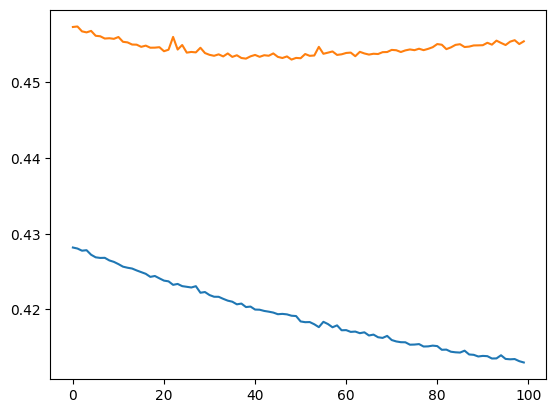

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) #seeing our model plotted

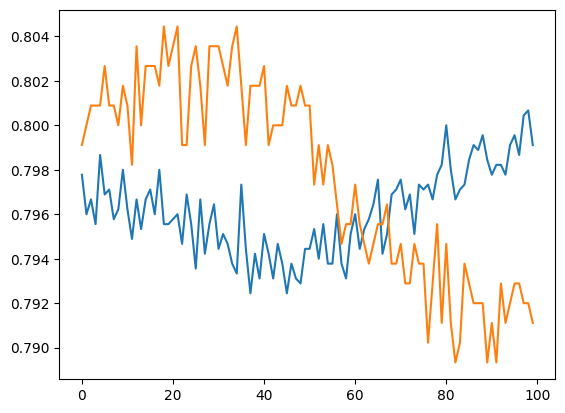

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

**as we can see the model is actually is not very good from the graphs where sigmoid was used in hidden layers so we will make one newer one with relu activation**

In [61]:
final_model = sq()

In [62]:
final_model.add(Dense(11,activation='relu',input_dim=11))
final_model.add(Dense(11,activation='relu'))
final_model.add(Dense(1,activation='sigmoid'))

final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
final_model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [64]:
history=final_model.fit(X_train_reshaped,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
90/90 [==============================] - 2s 6ms/step - loss: 0.5898 - accuracy: 0.6902 - val_loss: 0.5405 - val_accuracy: 0.7582
Epoch 2/100
90/90 [==============================] - 0s 3ms/step - loss: 0.5145 - accuracy: 0.7460 - val_loss: 0.5089 - val_accuracy: 0.7769
Epoch 3/100
90/90 [==============================] - 0s 4ms/step - loss: 0.4883 - accuracy: 0.7600 - val_loss: 0.4952 - val_accuracy: 0.7742
Epoch 4/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4749 - accuracy: 0.7644 - val_loss: 0.4869 - val_accuracy: 0.7733
Epoch 5/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4655 - accuracy: 0.7778 - val_loss: 0.4820 - val_accuracy: 0.7751
Epoch 6/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4586 - accuracy: 0.7833 - val_loss: 0.4782 - val_accuracy: 0.7804
Epoch 7/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4528 - accuracy: 0.7871 - val_loss: 0.4744 - val_accuracy: 0.7849
Epoch 8/100
9

In [65]:
final_model.layers[1].get_weights()

[array([[ 0.33179107,  0.24596094,  0.46113053,  0.14333487, -0.46645346,
          0.12256122,  0.3522992 ,  0.14625677,  0.55959415, -0.4409069 ,
          0.21641193],
        [ 0.05737359,  0.33135036,  0.38430825, -0.08223014, -0.19911703,
         -0.3220029 ,  0.08656058,  0.6247477 ,  0.02231886, -0.02519332,
          0.39181906],
        [ 0.09051003, -0.55614406, -0.27652076, -0.5905604 , -0.20641181,
          0.29841945, -0.16550887, -0.13168462,  0.08945   ,  0.2424733 ,
          0.5194534 ],
        [ 0.4268741 ,  0.61999387,  0.19753674,  0.4813236 , -0.00921972,
         -0.3145507 ,  0.33757484,  0.44191402, -0.2731661 ,  0.08246692,
          0.30407333],
        [ 0.17003946, -0.13817436, -1.1114341 , -0.2326072 ,  0.24104944,
          0.5779985 ,  0.3103621 , -0.24699397,  0.00347549, -0.07013855,
         -0.17609957],
        [-0.77252483, -0.18708378,  0.08832139, -0.31882694,  0.28794724,
          0.50468475,  0.77773535, -0.30872935,  0.5385786 ,  0.0536136

In [66]:
churn_log = final_model.predict(X_test_reshaped)

44/44 [==============================] - 0s 2ms/step


In [67]:
churn_pred=np.where(churn_log>0.5, 1, 0) #making it easier to understand by interprating the sigmoid output by our own accords

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,churn_pred)  #seeing the accuracy score

0.7938877043354655

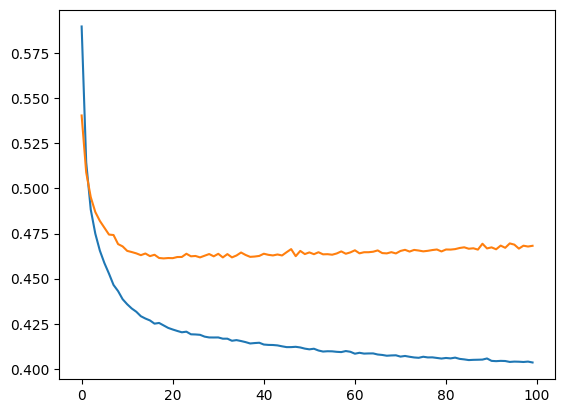

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) #seeing our model plotted

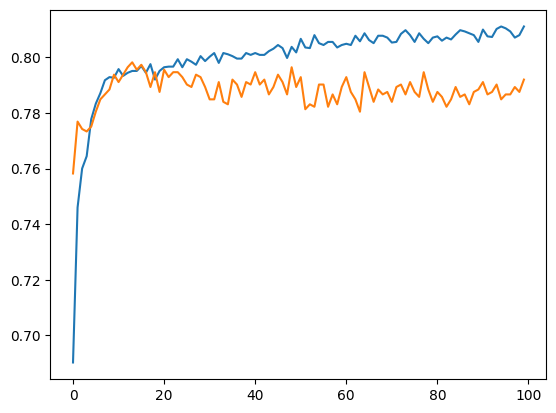

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) #seeing our model plotted

**so as we can see this model actually performs much better.**

## saving the model weights

In [71]:
final_model.save_weights('churn_weights.h5')

In [73]:
final_model.save('churn_prediction.h5')

C:\Users\91771\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
